In [1]:
%load_ext autoreload
%autoreload 2

In [117]:
from pareto_front import NSGAII
from summit.benchmarks import SnarBenchmark
from summit.utils.dataset import DataSet
from summit.utils.multiobjective import HvI

import matplotlib.pyplot as plt
import numpy as np
import json

## Random
Here, I am trying to used random search to determine the pareto front. I really do not think that works well though.

In [13]:
def determine_pareto_front(n_points=5000, random_seed=100):
    exp = SnarBenchmark()
    rand = Random(exp.domain, 
                  random_state=np.random.RandomState(random_seed))
    experiments = rand.suggest_experiments(n_points)
    exp.run_experiments(experiments)
    return exp

In [15]:
exp = determine_pareto_front(n_points=int(2e4))

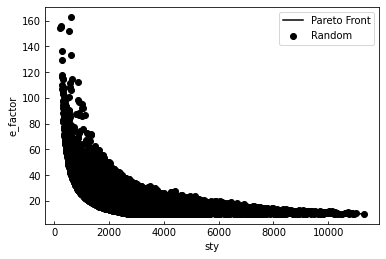

In [16]:
fig, ax = exp.pareto_plot()

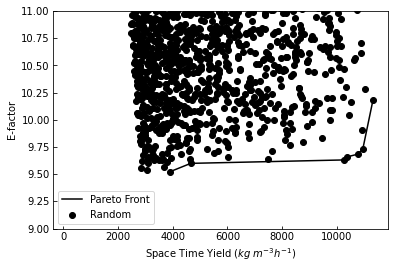

In [17]:
fig, ax = exp.pareto_plot()
names = [r'Space Time Yield ($kg \; m^{-3} h^{-1}$)', 'E-factor']
ax.set_xlabel(names[0])
ax.set_ylabel(names[1])
ax.set_ylim(9, 11)
ax.tick_params(direction='in')

## NSGAII

Here, I am using NSGA to determine the pareto front.

In [82]:
exp = SnarBenchmark()
exp.reset()
optimizer = NSGAII(exp)
r = optimizer.optimize(iterations=int(1e4))

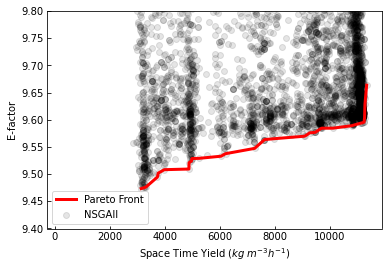

In [107]:
fig, ax = exp.pareto_plot()
names = [r'Space Time Yield ($kg \; m^{-3} h^{-1}$)', 'E-factor']
ax.set_xlabel(names[0])
ax.set_ylabel(names[1])
_ = ax.set_ylim(9.4, 9.8)

In [118]:
print("Size of the pareto front:", len(exp.pareto_data))

Size of the pareto front: 32


5.776913034365051

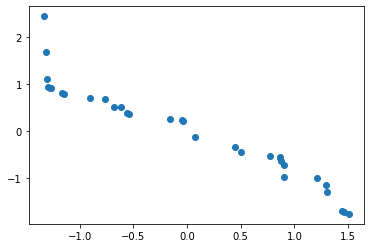

In [142]:
data = exp.pareto_data[['sty', 'e_factor']].to_numpy()
data[:, 0] = -1.0*data[:, 0]
means = np.mean(data, axis=0)
stds = np.std(data, axis=0)
data_std = (data-means)/stds

plt.scatter(data_std[:,0], data_std[:,1])
HvI.hypervolume(data_std, ref=[1.5,2])